In [1]:
import os
os.chdir('..')
import h5py
import cartopy.crs as ccrs
from notebooks import config
from utils.imgShow import imgShow
import matplotlib.pyplot as plt
from utils.geotif_io import readTiff
from utils.transform_xy import coor2coor


### **<font color=Yellow>Split</font>** <u>atl06</u> data by spots (groud tracks/beams) and orbits (ascending/descending)

In [3]:
# !h5ls data/icesat2/land_ice_antarctic/download_pineisland/processed_ATL06_20190102185636_00810212_004_01.h5 
# !python utils_main/split_atl06.py data/icesat2/land_ice_antarctic/download_pineisland/*ATL06*.h5 -o data/icesat2/land_ice_antarctic/preprocessed -n 4


### **<font color=Yellow>Merge</font>** the same spot and same orbit (ascending/descending) files into one files.

In [4]:
# ### ascending
# !python utils_main/merge_files.py data/icesat2/land_ice_antarctic/preprocessed/*ATL06*_spot1_A*.h5 -o data/icesat2/land_ice_antarctic/preprocessed/pineisland_atl06_spot1_A.h5
# !python utils_main/merge_files.py data/icesat2/land_ice_antarctic/preprocessed/*ATL06*_spot2_A*.h5 -o data/icesat2/land_ice_antarctic/preprocessed/pineisland_atl06_spot2_A.h5
# !python utils_main/merge_files.py data/icesat2/land_ice_antarctic/preprocessed/*ATL06*_spot3_A*.h5 -o data/icesat2/land_ice_antarctic/preprocessed/pineisland_atl06_spot3_A.h5
# !python utils_main/merge_files.py data/icesat2/land_ice_antarctic/preprocessed/*ATL06*_spot4_A*.h5 -o data/icesat2/land_ice_antarctic/preprocessed/pineisland_atl06_spot4_A.h5
# !python utils_main/merge_files.py data/icesat2/land_ice_antarctic/preprocessed/*ATL06*_spot5_A*.h5 -o data/icesat2/land_ice_antarctic/preprocessed/pineisland_atl06_spot5_A.h5
# !python utils_main/merge_files.py data/icesat2/land_ice_antarctic/preprocessed/*ATL06*_spot6_A*.h5 -o data/icesat2/land_ice_antarctic/preprocessed/pineisland_atl06_spot6_A.h5
# ### descending
# !python utils_main/merge_files.py data/icesat2/land_ice_antarctic/preprocessed/*ATL06*_spot1_D*.h5 -o data/icesat2/land_ice_antarctic/preprocessed/pineisland_atl06_spot1_D.h5
# !python utils_main/merge_files.py data/icesat2/land_ice_antarctic/preprocessed/*ATL06*_spot2_D*.h5 -o data/icesat2/land_ice_antarctic/preprocessed/pineisland_atl06_spot2_D.h5
# !python utils_main/merge_files.py data/icesat2/land_ice_antarctic/preprocessed/*ATL06*_spot3_D*.h5 -o data/icesat2/land_ice_antarctic/preprocessed/pineisland_atl06_spot3_D.h5
# !python utils_main/merge_files.py data/icesat2/land_ice_antarctic/preprocessed/*ATL06*_spot4_D*.h5 -o data/icesat2/land_ice_antarctic/preprocessed/pineisland_atl06_spot4_D.h5
# !python utils_main/merge_files.py data/icesat2/land_ice_antarctic/preprocessed/*ATL06*_spot5_D*.h5 -o data/icesat2/land_ice_antarctic/preprocessed/pineisland_atl06_spot5_D.h5
# !python utils_main/merge_files.py data/icesat2/land_ice_antarctic/preprocessed/*ATL06*_spot6_D*.h5 -o data/icesat2/land_ice_antarctic/preprocessed/pineisland_atl06_spot6_D.h5


### **<font color=Yellow>Merge</font>** same oribit (ascending/descending) files into one files.

In [4]:
### Ascending
# !python utils_main/merge_files.py data/icesat2/land_ice_antarctic/preprocessed/pineisland_atl06_spot?_A.h5 -o data/icesat2/land_ice_antarctic/preprocessed/pineisland_atl06_A.h5

### Descending
# !python utils_main/merge_files.py data/icesat2/land_ice_antarctic/preprocessed/pineisland_atl06_spot?_D.h5 -o data/icesat2/land_ice_antarctic/preprocessed/pineisland_atl06_D.h5




Running sequential code ...
Calculating lenght of output from all input files ...
('reading', 'data/icesat2/land_ice_antarctic/preprocessed/pineisland_atl06_spot1_D.h5')
('reading', 'data/icesat2/land_ice_antarctic/preprocessed/pineisland_atl06_spot2_D.h5')
('reading', 'data/icesat2/land_ice_antarctic/preprocessed/pineisland_atl06_spot3_D.h5')
('reading', 'data/icesat2/land_ice_antarctic/preprocessed/pineisland_atl06_spot4_D.h5')
('reading', 'data/icesat2/land_ice_antarctic/preprocessed/pineisland_atl06_spot5_D.h5')
('reading', 'data/icesat2/land_ice_antarctic/preprocessed/pineisland_atl06_spot6_D.h5')
('merged', 6, 'files')
('output ->', 'data/icesat2/land_ice_antarctic/preprocessed/pineisland_atl06_D.h5')


### **<font color=Yellow>Merge</font>** all the files (ascending/descending, spot1-spot6) into one files.

In [16]:
# !python utils_main/merge_files.py data/icesat2/land_ice_antarctic/preprocessed/*ATL06*_spot*.h5 -o data/icesat2/land_ice_antarctic/preprocessed/pineisland_atl06_AD.h5



### **<font color=Yellow> Split </font>** the file into multiple files.

In [66]:
# !h5ls data/icesat2/land_ice_antarctic/preprocessed/pineisland_atl06_spot1_A.h5 
# !python utils_main/split_file.py data/icesat2/land_ice_antarctic/preprocessed/pineisland_atl06_spot1_A.h5 -k 10


### **Visualization**

In [6]:
path_img = config.root + '/data/rs_img/pine_island_S3A_20180207T115228_20180207T115528.tif'
s3_img, s3_img_info = readTiff(path_img)
print(s3_img_info)


{'geoextent': (-1741002.5304, -1437153.6139, -380178.3167, -165679.325), 'geotrans': (-1741002.5304, 295.8606781888998, 0.0, -165679.325, 0.0, -295.8606782068966), 'geosrs': '3031', 'row': 725, 'col': 1027, 'bands': 3}


### Compare merged and splitted files

In [10]:
## splited spot1_ascending
with h5py.File('data/icesat2/land_ice_antarctic/preprocessed/processed_ATL06_20190510125546_06450312_004_01_gt1l_spot1_A.h5','r') as f_a:
    lat_spot1a_20190510   = f_a['lat'][:]
    lon_spot1a_20190510   = f_a['lon'][:]
    h_elv_spot1a_20190510 = f_a['h_elv'][:]
    t_yrs_spot1a_20190510 = f_a['t_year'][:]

## merged spot1_ascending
with h5py.File('data/icesat2/land_ice_antarctic/preprocessed/pineisland_atl06_spot1_A.h5','r') as f_a:
    lat_spot1a   = f_a['lat'][:]
    lon_spot1a   = f_a['lon'][:]
    h_elv_spot1a = f_a['h_elv'][:]
    t_yrs_spot1a = f_a['t_year'][:]

## merge all ascending/descending and spot1-spot6 
with h5py.File('data/icesat2/land_ice_antarctic/preprocessed/pineisland_atl06_AD.h5','r') as f_a:
    lat_merge_ad   = f_a['lat'][:]
    lon_merge_ad   = f_a['lon'][:]
    h_elv_merge_ad = f_a['h_elv'][:]
    t_yrs_merge_ad = f_a['t_year'][:]


## split spot1_ascending into 10 files
with h5py.File('data/icesat2/land_ice_antarctic/preprocessed/pineisland_atl06_spot1_A_000.h5','r') as f_a:
    lat_spot1a_000   = f_a['lat'][:]
    lon_spot1a_000   = f_a['lon'][:]
    h_elv_spot1a_000 = f_a['h_elv'][:]
    t_yrs_spot1a_000 = f_a['t_year'][:]


lon_spot1a_20190510_proj, lat_spot1a_20190510_proj = coor2coor(srs_from=4326, srs_to=s3_img_info['geosrs'], x=lon_spot1a_20190510, y=lat_spot1a_20190510)
lon_spot1a_proj, lat_spot1a_proj = coor2coor(srs_from=4326, srs_to=s3_img_info['geosrs'], x=lon_spot1a, y=lat_spot1a)
lon_ad_proj, lat_ad_proj = coor2coor(srs_from=4326, srs_to=s3_img_info['geosrs'], x=lon_merge_ad, y=lat_merge_ad)
lon_spot1a_000_proj, lat_spot1a_000_proj = coor2coor(srs_from=4326, srs_to=s3_img_info['geosrs'], x=lon_spot1a_000, y=lat_spot1a_000)



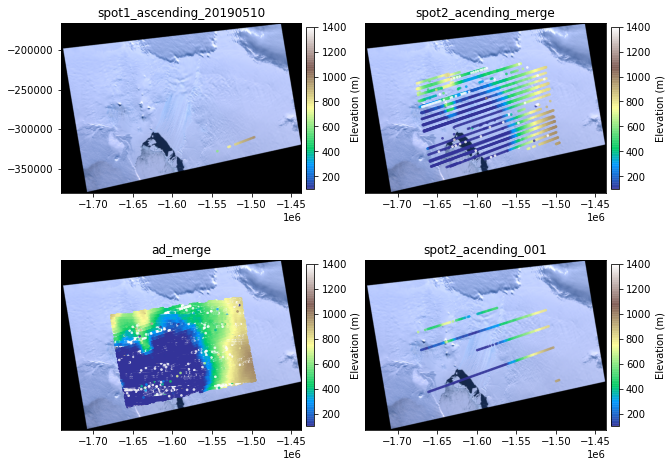

In [15]:
fig = plt.figure(figsize=(10,8))
plt.subplot(2,2,1)
imgShow(s3_img, extent=s3_img_info['geoextent'], color_bands=(0, 1, 2), clip_percent=5)
plt.scatter(lon_spot1a_20190510_proj[::100], lat_spot1a_20190510_proj[::100], s=3, c=h_elv_spot1a_20190510[::100], alpha=.7, cmap='terrain')
plt.clim([100,1400])
plt.title('spot1_ascending_20190510')
plt.colorbar(fraction=0.0320, pad=0.02, label='Elevation (m)')


plt.subplot(2,2,2)
imgShow(s3_img, extent=s3_img_info['geoextent'], color_bands=(0, 1, 2), clip_percent=5)
plt.scatter(lon_spot1a_proj[::100], lat_spot1a_proj[::100], s=3, c=h_elv_spot1a[::100], alpha=.7, cmap='terrain')
plt.clim([100,1400])
plt.yticks([])
plt.title('spot2_acending_merge')
plt.colorbar(fraction=0.0320, pad=0.02, label='Elevation (m)')


plt.subplot(2,2,3)
imgShow(s3_img, extent=s3_img_info['geoextent'], color_bands=(0, 1, 2), clip_percent=5)
plt.scatter(lon_ad_proj[::100], lat_ad_proj[::100], s=3, c=h_elv_merge_ad[::100], alpha=.7, cmap='terrain')
plt.clim([100,1400])
plt.yticks([])
plt.title('ad_merge')
plt.colorbar(fraction=0.0320, pad=0.02, label='Elevation (m)')

plt.subplot(2,2,4)
imgShow(s3_img, extent=s3_img_info['geoextent'], color_bands=(0, 1, 2), clip_percent=5)
plt.scatter(lon_spot1a_000_proj[::100], lat_spot1a_000_proj[::100], s=3, c=h_elv_spot1a_000[::100], alpha=.7, cmap='terrain')
plt.clim([100,1400])
plt.yticks([])
plt.title('spot2_acending_001')
plt.colorbar(fraction=0.0320, pad=0.02, label='Elevation (m)')



### Compare different spots (1-6) data

In [61]:
## spot1
with h5py.File('data/icesat2/land_ice_antarctic/preprocessed/pineisland_atl06_spot1_A.h5','r') as f_a:
    lat_spot1a   = f_a['lat'][:]
    lon_spot1a   = f_a['lon'][:]
    h_elv_spot1a = f_a['h_elv'][:]
    t_yrs_spot1a = f_a['t_year'][:]
    print(f_a.keys())

## spot2
with h5py.File('data/icesat2/land_ice_antarctic/preprocessed/pineisland_atl06_spot2_A.h5','r') as f_a:
    lat_spot2a   = f_a['lat'][:]
    lon_spot2a   = f_a['lon'][:]
    h_elv_spot2a = f_a['h_elv'][:]
    t_yrs_spot2a = f_a['t_year'][:]
## spot3
with h5py.File('data/icesat2/land_ice_antarctic/preprocessed/pineisland_atl06_spot3_A.h5','r') as f_a:
    lat_spot3a   = f_a['lat'][:]
    lon_spot3a   = f_a['lon'][:]
    h_elv_spot3a = f_a['h_elv'][:]
    t_yrs_spot3a = f_a['t_year'][:]
## spot4
with h5py.File('data/icesat2/land_ice_antarctic/preprocessed/pineisland_atl06_spot4_A.h5','r') as f_a:
    lat_spot4a   = f_a['lat'][:]
    lon_spot4a   = f_a['lon'][:]
    h_elv_spot4a = f_a['h_elv'][:]
    t_yrs_spot4a = f_a['t_year'][:]
## spot5
with h5py.File('data/icesat2/land_ice_antarctic/preprocessed/pineisland_atl06_spot5_A.h5','r') as f_a:
    lat_spot5a   = f_a['lat'][:]
    lon_spot5a   = f_a['lon'][:]
    h_elv_spot5a = f_a['h_elv'][:]
    t_yrs_spot5a = f_a['t_year'][:]
## spot6
with h5py.File('data/icesat2/land_ice_antarctic/preprocessed/pineisland_atl06_spot6_A.h5','r') as f_a:
    lat_spot6a   = f_a['lat'][:]
    lon_spot6a   = f_a['lon'][:]
    h_elv_spot6a = f_a['h_elv'][:]
    t_yrs_spot6a = f_a['t_year'][:]

lon_spot1a_proj, lat_spot1a_proj = coor2coor(srs_from=4326, srs_to=s3_img_info['geosrs'], x=lon_spot1a, y=lat_spot1a)
lon_spot2a_proj, lat_spot2a_proj = coor2coor(srs_from=4326, srs_to=s3_img_info['geosrs'], x=lon_spot2a, y=lat_spot2a)
lon_spot3a_proj, lat_spot3a_proj = coor2coor(srs_from=4326, srs_to=s3_img_info['geosrs'], x=lon_spot3a, y=lat_spot3a)
lon_spot4a_proj, lat_spot4a_proj = coor2coor(srs_from=4326, srs_to=s3_img_info['geosrs'], x=lon_spot4a, y=lat_spot4a)
lon_spot5a_proj, lat_spot5a_proj = coor2coor(srs_from=4326, srs_to=s3_img_info['geosrs'], x=lon_spot5a, y=lat_spot5a)
lon_spot6a_proj, lat_spot6a_proj = coor2coor(srs_from=4326, srs_to=s3_img_info['geosrs'], x=lon_spot6a, y=lat_spot6a)


<KeysViewHDF5 ['beam_type', 'cycle', 'h_elv', 'lat', 'lon', 'quality_summary', 'rgt', 'spot', 't_year']>


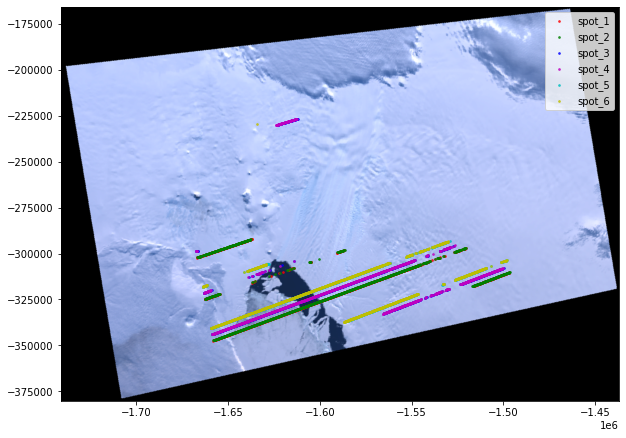

In [63]:
fig = plt.figure(figsize=(10, 10))
n_sam = 10
start_sam = 100000
end_sam = 110000
imgShow(s3_img, extent=s3_img_info['geoextent'], color_bands=(0, 1, 2), clip_percent=5)
plt.scatter(lon_spot1a_proj[start_sam:end_sam:n_sam], lat_spot1a_proj[start_sam:end_sam:n_sam], s=3, alpha=.7, c='r',label='spot_1')
plt.scatter(lon_spot2a_proj[start_sam:end_sam:n_sam], lat_spot2a_proj[start_sam:end_sam:n_sam], s=3, alpha=.7, c='g',label='spot_2')
plt.scatter(lon_spot3a_proj[start_sam:end_sam:n_sam], lat_spot3a_proj[start_sam:end_sam:n_sam], s=3, alpha=.7, c='b',label='spot_3')
plt.scatter(lon_spot4a_proj[start_sam:end_sam:n_sam], lat_spot4a_proj[start_sam:end_sam:n_sam], s=3, alpha=.7, c='m',label='spot_4')
plt.scatter(lon_spot5a_proj[start_sam:end_sam:n_sam], lat_spot5a_proj[start_sam:end_sam:n_sam], s=3, alpha=.7, c='c',label='spot_5')
plt.scatter(lon_spot6a_proj[start_sam:end_sam:n_sam], lat_spot6a_proj[start_sam:end_sam:n_sam], s=3, alpha=.7, c='y',label='spot_6')

# plt.xlim(-1.68*1e6, -1.65*1e6)
# plt.ylim(-255000, -240000)

plt.legend()
